---
format:
  html:
    page-layout: full
    theme: united
    embed-resources: true
    code-fold: true
    css: styles.css
---


<style>
  @keyframes slideFadeIn {
    from { opacity: 0; transform: translateY(-20px); }
    to   { opacity: 1; transform: translateY(0); }
  }
  #animated-h1 {
    opacity: 0;
    transform: translateY(-20px);
    animation: slideFadeIn 1s ease-out 0.2s forwards;
  }
</style>
<div id="animated-h1">
<div style="width:100%; display:flex; align-items:center;">
<div style="width:80%;">
<h1 style =" color: #800000">
Unveiling the Connection: How Economy, Infrastructure &amp; Society Shape Healthcare Access
</h1>
</div>
<div style="width:20%; margin-right:25px; margin-top:-15px " >
<img src="logo.png" alt="logo" style="width:100%; height:auto; margin:10%;" />
</div>
</div>


<p>Healthcare access is influenced by a combination of economic growth, healthcare infrastructure, and social factors. While wealthier nations often have better healthcare coverage, inflation and economic instability can undermine progress. Strong infrastructure, including hospital availability and government policies, plays a crucial role in expanding essential health services. Social dynamics, such as birth rates, life expectancy, and population size, further shape healthcare accessibility. This analysis explores these interconnected factors through interactive visualizations, revealing trends, disparities, and the key drivers behind healthcare service coverage worldwide.</p>
<div style="width: 100%; display: flex; align-items:center;">
<div style="width: 60%; padding: 10px;" >

In [117]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML
import plotly.io as pio
from plotnine import *


indicator_df = (
    pd.read_csv("data/unicef_indicator_2.csv")
      .rename(columns={
          "country_name": "country",
          "obs_value":     "coverage",
          "time_period":   "year"
      })
)

metadata_df = pd.read_csv("data/unicef_metadata.csv")

iso_map = (
    metadata_df[["country", "alpha_3_code"]]
      .drop_duplicates()
      .set_index("country")["alpha_3_code"]
      .to_dict()
)


df = indicator_df[["country", "year", "coverage"]].copy()
df["iso3"] = df["country"].map(iso_map)
df = df.dropna(subset=["iso3"])         # drop any unmatched countries
df["coverage"] = df["coverage"].round(2) # round for display


fig = px.choropleth(
    df,
    locations="iso3",
    color="coverage",
    hover_name="country",
    hover_data={
        "coverage": True,
        "iso3":     False,
        "year":     True
    },
    animation_frame="year",
    color_continuous_scale="YlOrRd",
    projection="natural earth",
    width=600,
    height=350
)


fig.layout.updatemenus = []


fig.layout.sliders[0].currentvalue.visible = False




fig.update_layout(
    font_family="Arial",
    title_x=0.5,
    margin={"r":0,"t":0,"l":0,"b":0},
    geo=dict(showframe=False, showcoastlines=False, bgcolor="rgba(0,0,0,0)"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    sliders=[dict(
        x=0.5,
        xanchor="center",
        len=0.6,
        y=0.02,
        yanchor="bottom",
        pad=dict(t=0, b=10)
    )]
)
s = fig.layout.sliders[0]
s.x = 0.5            # position at 50% of the width
s.xanchor = "center"
s.len = 0.6          # 60% of the full width (tweak as you like)


fig.update_coloraxes(
    colorbar_thickness=10,   # px thickness of the bar
    colorbar_len=0.6,        # 60% of the plot height
    colorbar_x=0.98,         # push it just outside the map
    colorbar_xanchor="center",
    colorbar_title_text=""
)


fig.update_geos(
    fitbounds="locations",   # zoom so all your data fills the viewport
    visible=False            # hide the default coastlines/frame
)

fig.update_layout(
    margin=dict(l=0, r=2, t=0, b=0),
    autosize=True
)


HTML(pio.to_html(fig, full_html=True, config={'displayModeBar': False}, include_plotlyjs="cdn"))


</div>
<div style="width: 40%; padding: 10px; align-items: center;" >
<p style="color: black ; font-weight: bold"> Global Coverage of Essential Health Services </p>
<p>Healthcare access varies significantly worldwide, aﬀecting millions. This map visualizes from the time period of 2000 to 2021. Coverage of Essential Health Services for each country over time, highlighting global disparities and trends.Darker shades indicate higher healthcare coverage, while lighter shades represent lower access to essential health service.</p>
</div>
</div>

<div style="width: 100%; display: flex; align-items:center;">
<div style="width: 40%; padding: 10px;" >


<div>


<p style="font-weight: bold;"> Wealth Drives Healthcare Access:</p>
<p>Countries with higher GDP per capita tend to have better essential health service
(CEHS) coverage due to greater investments in healthcare infrastructure, medical
staﬀ, and public health programs.

Higher life expectancy is often observed in countries with strong healthcare
systems, reinforcing the long-term benefits of economic development.</p>

</div>
</div>

<div style="width: 55%; padding: 10px;" >

In [118]:




from plotnine import *
import pandas as pd

indicator_df = pd.read_csv("data/unicef_indicator_2.csv")
metadata_df = pd.read_csv("data/unicef_metadata.csv")

healthcare_df = indicator_df[indicator_df["indicator"] == "Coverage of essential health services"]

metadata_df = metadata_df.rename(columns={"year": "time_period"})

merged_df = pd.merge(
    healthcare_df,
    metadata_df[[
        "country", "time_period",
        "GDP per capita (constant 2015 US$)",
        "Life expectancy at birth, total (years)"
    ]],
    on=["country", "time_period"],
    how="inner"
)

merged_df = merged_df.rename(columns={
    "obs_value": "Healthcare_Coverage",
    "GDP per capita (constant 2015 US$)": "GDP_per_capita",
    "Life expectancy at birth, total (years)": "Life_Expectancy"
})

plot_df = merged_df.dropna(subset=["Healthcare_Coverage", "GDP_per_capita", "Life_Expectancy"])

fig = px.scatter(
    plot_df,
    x="GDP_per_capita",
    y="Healthcare_Coverage",
    color="Life_Expectancy",
    color_continuous_scale=["blue", "purple", "orange", "red"],
    trendline="ols",
    trendline_color_override="gray",
    labels={
        "GDP_per_capita":      "GDP per capita (2015 US$)",
        "Healthcare_Coverage": "Essential Healthcare Coverage (%)",
        "Life_Expectancy":     ""
    },
    hover_data={
        "GDP_per_capita":      ":.0f",
        "Healthcare_Coverage": ":.1f",
        "Life_Expectancy":     ":.1f"
    },
    template="plotly_white"
)

fig.update_yaxes(range=[10, 100])

fig.update_layout(
    title="Economic Factors & Healthcare Coverage",
    title_x=0.5,
    width=600,
    height=600,
    margin=dict(l=60, r=20, t=60, b=60),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    coloraxis_colorbar=dict(
        thickness=10,
        len=0.5  
    )
)

HTML(fig.to_html(full_html=False, config={'displayModeBar': False}, include_plotlyjs="cdn"))


</div>
</div>


<ul>

<li>
**More Hospital Beds → Better CEHS**
Higher hospital bed availability aligns with stronger healthcare coverage.</li>
<li>

**Regional Disparities Exist**
Some regions have fewer hospital beds despite healthcare needs, exposing infrastructure gaps.</li>
<li>**Low CEHS % → Strained Facilities**
Countries with low hospital capacity struggle to expand healthcare services.Strong healthcare infrastructure is essential for improving service coverage and accessibility.
</li>
</ul>




<div style="display: flex; justify-content: center;">

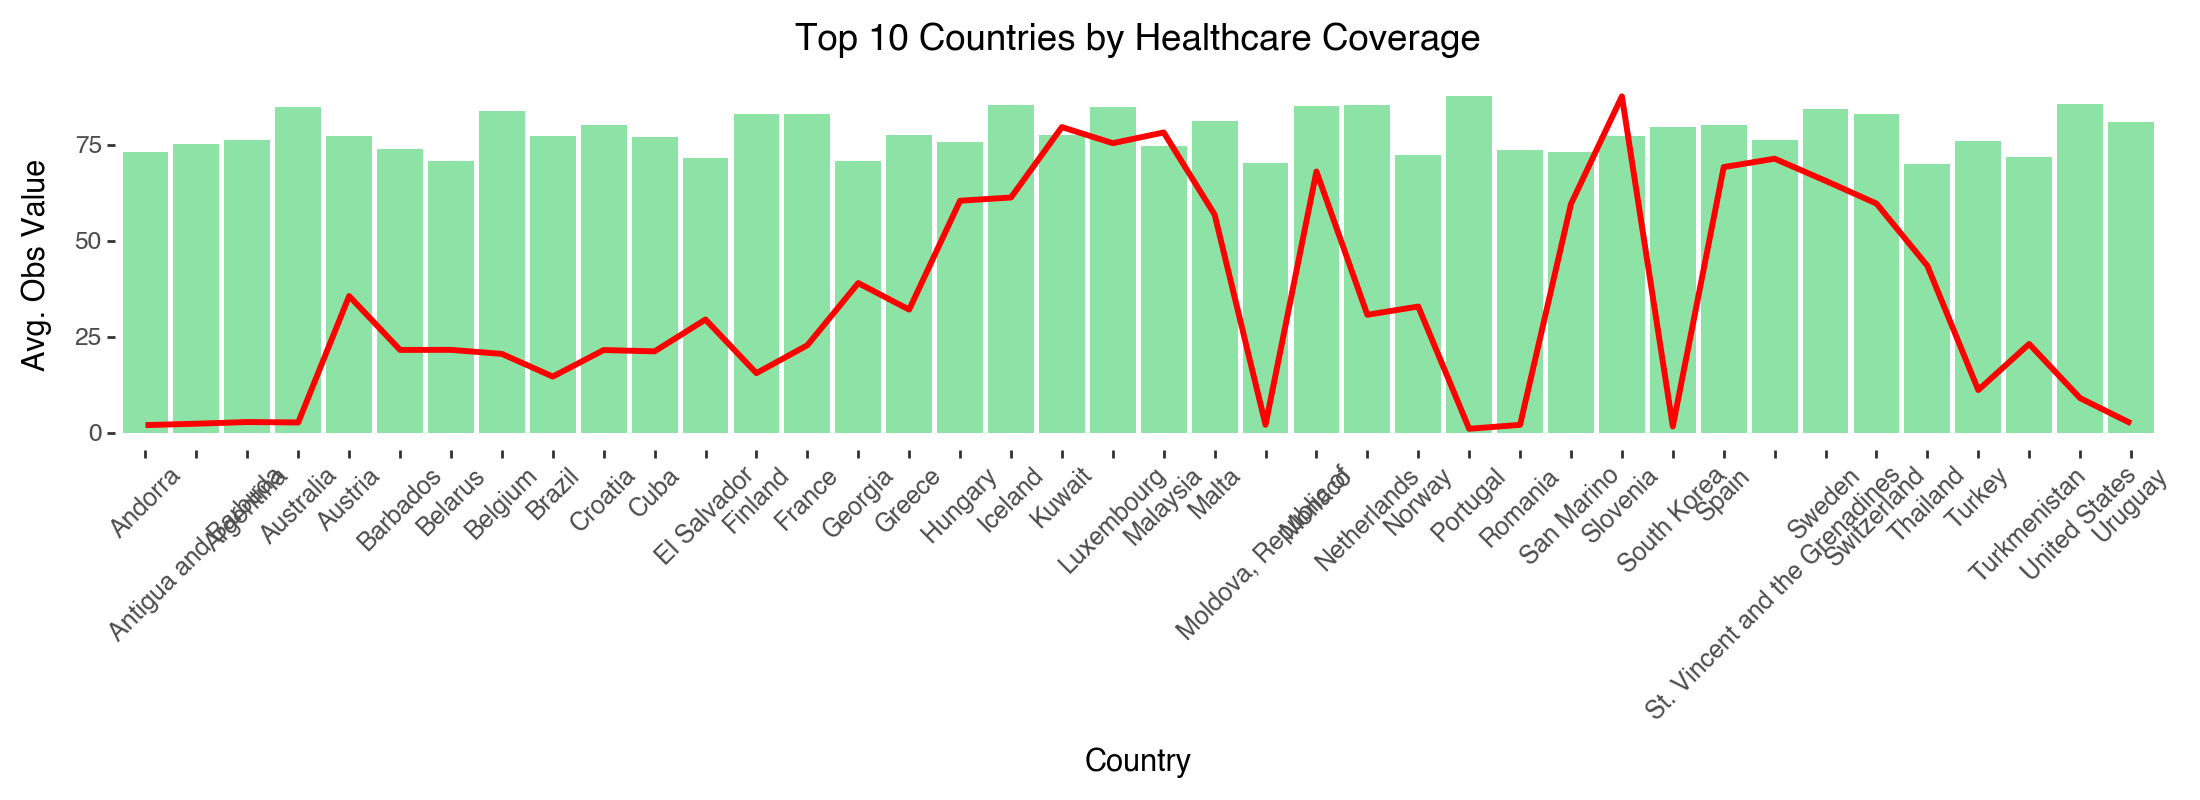

In [125]:



df = indicator_df.rename(columns={
    "country_name": "country",
    "obs_value": "observed_value",
    "time_period": "year"
})

df['hospital_beds'] = metadata_df["Hospital beds (per 1,000 people)"]
df = df.dropna(subset=["observed_value", "hospital_beds"])

avg_df = (
    df.groupby("country")[["observed_value", "hospital_beds"]]
    .mean()
    .reset_index()
)

top_df = avg_df.sort_values(by="observed_value", ascending=False).head(40)

scaling_factor = top_df["observed_value"].max() / top_df["hospital_beds"].max()
top_df["hospital_beds_scaled"] = top_df["hospital_beds"] * scaling_factor

(
    ggplot(top_df) +
    aes(x="country") +
    geom_col(aes(y="observed_value"), fill="#8de2a6") +
    geom_line(aes(y="hospital_beds_scaled"), color="red", size=1.2, group=1) +
    labs(
        title="Top 10 Countries by Healthcare Coverage",
        x="Country",
        y="Avg. Obs Value"
    ) +
    theme(
        axis_text_x=element_text(rotation=45, size=9),
        figure_size=(11, 4),
        legend_position='none',
        panel_background=element_rect(fill="#ffffff", color=None),
        plot_background=element_rect(fill="#ffffff", color=None)
    )
)



</div>
<div style="width: 100%; display: flex; align-items:center;">
<div style="width: 60%; padding: 10px;" >

In [120]:


from IPython.display import HTML, display

metadata_df = metadata_df.rename(columns={"year": "time_period"})

merged_df = pd.merge(
    healthcare_df,
    metadata_df[["country", "time_period", "Birth rate, crude (per 1,000 people)", "Population, total"]],
    on=["country", "time_period"],
    how="inner"
)

merged_df = merged_df.rename(columns={
    "obs_value": "Healthcare_Coverage",
    "Birth rate, crude (per 1,000 people)": "Birth_Rate",
    "Population, total": "Population"
})

plot_df = merged_df.dropna(subset=["Healthcare_Coverage", "Birth_Rate", "Population"])

fig = px.scatter(
    plot_df,
    x="Healthcare_Coverage",
    y="Birth_Rate",
    size="Population",
    color="country",
    size_max=30,
    hover_data={
        "Healthcare_Coverage": ":.1f",
        "Birth_Rate":           ":",
        "Population":           ":,"
    },
    labels={
        "Healthcare_Coverage": "Essential Healthcare Coverage (%)",
        "Birth_Rate":           "Birth rate, crude (per 1,000 people)",
        "Population":           "Population"
    },
   
)

fig.update_layout(
    title="Birth Rate & Healthcare Coverage",
    title_x=0.5,
    width=600,
    height=400,
    showlegend=False,
    margin=dict(l=60, r=20, t=60, b=60),
    paper_bgcolor="rgba(0,0,0,0)",    # solid dark
    plot_bgcolor="rgba(0,0,0,0)"      # solid dark
)

# remove the x-axis line, keep only tick labels
fig.update_xaxes(
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgba(0,0,0,0.3)",  # light‐gray grid
    gridwidth=1,
)

# style the y-axis grid the same way
fig.update_yaxes(
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgba(0,0,0,0.3)",
    gridwidth=1,
)

fig.update_traces(marker=dict(line=dict(color='gray', width=1)))

# kill the little toolbar
config = {"displayModeBar": False}

HTML(fig.to_html(full_html=False, include_plotlyjs="cdn", config=config))


</div>
<div style="width: 40%; padding: 10px;" >
<ul>
<li>**Higher the Essential healthcare service(CEHS) % → Longer Life Expectancy**
Better healthcare leads to lower mortality rates and longer lifespans.Countries with rising CEHS % often see life expectancy improve over time.</li>
<li>

**Lower the Essential healthcare service CEHS % → Higher Birth Rates**
Limited healthcare access correlates with higher birth rates, due to lack of family planning and maternal care.Larger populations with low CEHS % put pressure on healthcare systems.</li>
<li>**Balancing Population Growth & Healthcare Demand**
Investing in healthcare not only extends life expectancy but also helps stabilize birth rates.Sustainable healthcare access is key to breaking cycles of poor health and overburdened system</li>
</ul>





</div>
</div>

<div style="display: flex; justify-content: center;">

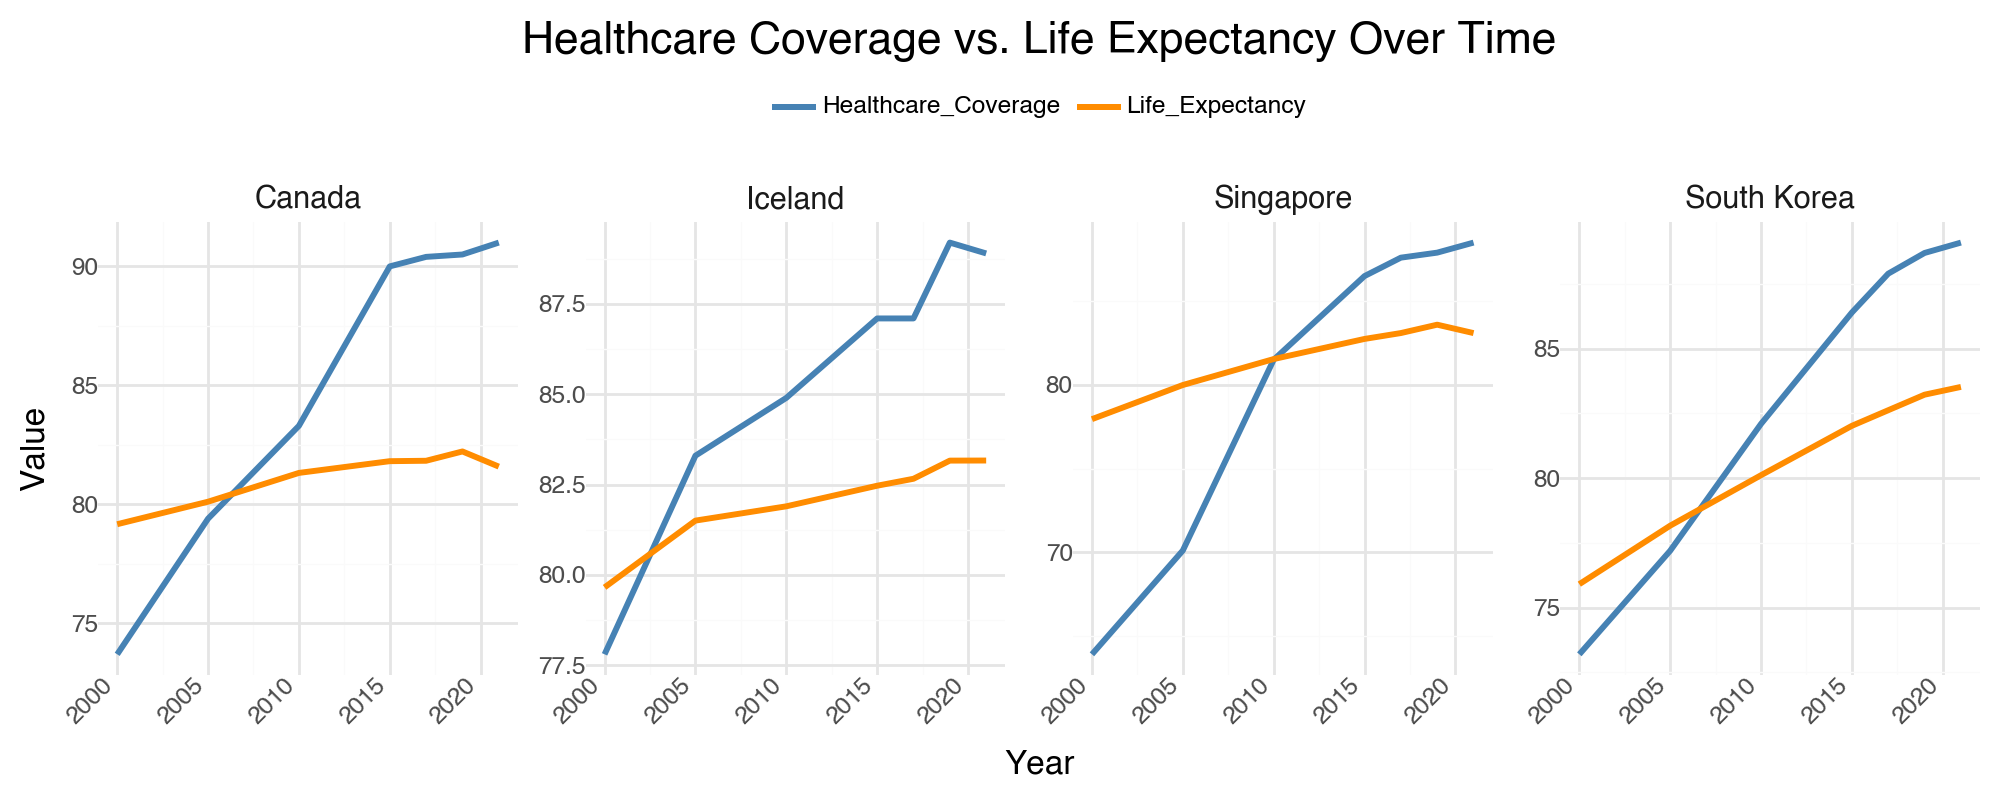

In [121]:


from plotnine import (
    ggplot, aes, geom_line, labs,
    theme_minimal, theme, element_text,
    facet_wrap, scale_color_manual
)
import pandas as pd

def plot_top5_health_and_life(indicator_df, metadata_df):
    cov = indicator_df[
        indicator_df["indicator"] == "Coverage of essential health services"
    ].copy()

    idx = cov.groupby("country")["time_period"].idxmax()
    latest = cov.loc[idx].reset_index(drop=True)

    top5 = latest.nlargest(4, "obs_value")["country"].tolist()

    cov_ts = cov[cov["country"].isin(top5)][
        ["country", "time_period", "obs_value"]
    ].rename(columns={"obs_value": "Healthcare_Coverage"})

    life_ts = metadata_df[
        metadata_df["country"].isin(top5)
    ][["country", "time_period", "Life expectancy at birth, total (years)"]].rename(
        columns={"Life expectancy at birth, total (years)": "Life_Expectancy"}
    )

    df = (
        pd.merge(cov_ts, life_ts, on=["country", "time_period"], how="inner")
          .sort_values(["country", "time_period"])
    )

    df_long = pd.melt(
        df,
        id_vars=["country", "time_period"],
        value_vars=["Healthcare_Coverage", "Life_Expectancy"],
        var_name="Measure",
        value_name="Value"
    )

    p = (
        ggplot(df_long, aes(x="time_period", y="Value", color="Measure"))
        + geom_line(size=1.2)
        + facet_wrap('~country', nrow=1, scales="free_y")
        + scale_color_manual({
            "Healthcare_Coverage": "steelblue",
            "Life_Expectancy":    "darkorange"
        })
        + labs(
            title="Healthcare Coverage vs. Life Expectancy Over Time",
            x="Year",
            y="Value",
        )
        + theme_minimal()
        + theme(
            figure_size=(10, 4),
            plot_title=element_text(size=16, weight="bold", ha="center"),
            axis_text_x=element_text(rotation=45, hjust=1),
            axis_title=element_text(size=12, weight="bold"),
            strip_text=element_text(size=11, weight="bold"),
            legend_title=element_blank(),
            legend_position="top"
        )
    )
    return p

# Example usage:
plot_top5_health_and_life(indicator_df, metadata_df)



</div>

The interplay between healthcare coverage and life expectancy becomes vividly clear when tracking top-performing countries over time. As seen in Canada, Iceland, Singapore, and South Korea nations with consistently high Coverage of Essential Health Services (CEHS)life expectancy trends upward in near lockstep with improved healthcare access. This reinforces the dashboard’s earlier findings: economic stability (evident in these high-GDP nations) and robust infrastructure (like hospital beds, shown in prior charts) create a virtuous cycle. Strong healthcare systems reduce preventable mortality, extending lifespans while conversely, as noted in the birth rate analysis, limited coverage perpetuates demographic and health disparities. These top performers exemplify how sustained investment in healthcare yields compounding societal benefits, mirroring the global trends but with measurable outcomes.

<center style="color: #800000; font-weight: bold;">
  Conclusion
</center>

**Economic growth, healthcare infrastructure, and social factors are key drivers of healthcare coverage. Wealthier countries with higher GDP per capita generally have better healthcare access, but macroeconomic instability, like inflation, can reduce this. Strong healthcare infrastructure, such as more hospital beds, is essential for expanding service coverage. Additionally, better healthcare improves life expectancy and lowers birth rates, while countries with limited healthcare face challenges like higher birth rates and shorter life expectancy.Sustainable healthcare progress requires a balance of economic stability,robust infrastructure, and social policies to improve long-term healthcare access and outcomes.**


</div>

<div style="width: 100%; text-align: center; padding: 20px;">
  <a href="https://www.unicef.ie/donate/?utm_source=unicef.org.referral&utm_medium=donatelink&utm_content=donate&utm_campaign=unicef.org#1" 
     style="display: inline-block; padding: 10px 20px; background-color: #0077c8; color: white; text-decoration: none; font-weight: bold; border-radius: 5px; font-family: Arial, sans-serif;">
    Donate Now
  </a>
</div>
</div>

  </div>